In [1]:
from google.colab import files

# This will prompt you to upload the file
uploaded = files.upload()

# List uploaded files
for file_name in uploaded.keys():
    print(f"Uploaded file: {file_name}")


Saving upliance.xlsx to upliance.xlsx
Uploaded file: upliance.xlsx


In [2]:
import pandas as pd

# Load the uploaded Excel file
file_path = 'upliance.xlsx'  # Replace with your uploaded file's name if different
excel_data = pd.ExcelFile(file_path)

# Check available sheet names
print("Sheet names:", excel_data.sheet_names)

# Load individual sheets
user_details = pd.read_excel(file_path, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(file_path, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(file_path, sheet_name='OrderDetails.csv')

# Display a sample of the data
print(user_details.head())
print(cooking_sessions.head())
print(order_details.head())


Sheet names: ['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv']
  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  
  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00

In [3]:
# Check for missing values
print("Missing Data Summary:")
print(user_details.isnull().sum())
print(cooking_sessions.isnull().sum())
print(order_details.isnull().sum())

# Fill missing values
order_details['Rating'].fillna(order_details['Rating'].mean(), inplace=True)

# Drop duplicates
user_details.drop_duplicates(inplace=True)
cooking_sessions.drop_duplicates(inplace=True)
order_details.drop_duplicates(inplace=True)

# Convert dates to datetime format
user_details['Registration Date'] = pd.to_datetime(user_details['Registration Date'])
cooking_sessions['Session Start'] = pd.to_datetime(cooking_sessions['Session Start'])
cooking_sessions['Session End'] = pd.to_datetime(cooking_sessions['Session End'])
order_details['Order Date'] = pd.to_datetime(order_details['Order Date'])

Missing Data Summary:
User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


<ipython-input-3-1ce8ce51f77a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_details['Rating'].fillna(order_details['Rating'].mean(), inplace=True)


In [4]:
sessions_orders = pd.merge(cooking_sessions, order_details, on='Session ID', how='outer')


In [5]:
print("Columns in sessions_orders:", sessions_orders.columns.tolist())
print("Columns in user_details:", user_details.columns.tolist())


Columns in sessions_orders: ['Session ID', 'User ID_x', 'Dish Name_x', 'Meal Type_x', 'Session Start', 'Session End', 'Duration (mins)', 'Session Rating', 'Order ID', 'User ID_y', 'Order Date', 'Meal Type_y', 'Dish Name_y', 'Order Status', 'Amount (USD)', 'Time of Day', 'Rating']
Columns in user_details: ['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone', 'Email', 'Favorite Meal', 'Total Orders']


In [6]:
# Remove leading/trailing spaces and make column names consistent
sessions_orders.columns = sessions_orders.columns.str.strip().str.lower().str.replace(' ', '_')
user_details.columns = user_details.columns.str.strip().str.lower().str.replace(' ', '_')

# Check column names again
print("Cleaned columns in sessions_orders:", sessions_orders.columns.tolist())
print("Cleaned columns in user_details:", user_details.columns.tolist())


Cleaned columns in sessions_orders: ['session_id', 'user_id_x', 'dish_name_x', 'meal_type_x', 'session_start', 'session_end', 'duration_(mins)', 'session_rating', 'order_id', 'user_id_y', 'order_date', 'meal_type_y', 'dish_name_y', 'order_status', 'amount_(usd)', 'time_of_day', 'rating']
Cleaned columns in user_details: ['user_id', 'user_name', 'age', 'location', 'registration_date', 'phone', 'email', 'favorite_meal', 'total_orders']


In [7]:
if 'user_id' in sessions_orders.columns:
    print("User ID exists in sessions_orders")
else:
    print("User ID is missing in sessions_orders")

if 'user_id' in user_details.columns:
    print("User ID exists in user_details")
else:
    print("User ID is missing in user_details")


User ID is missing in sessions_orders
User ID exists in user_details


In [8]:
final_data = pd.merge(
    sessions_orders,
    user_details,
    left_on='user_id_y',  # Column name in sessions_orders
    right_on='user_id',   # Column name in user_details
    how='outer'           # Outer join to retain all rows
)
print(final_data.head())


  session_id user_id_x      dish_name_x meal_type_x       session_start  \
0       S001      U001        Spaghetti      Dinner 2024-12-01 19:00:00   
1       S004      U001         Pancakes   Breakfast 2024-12-02 07:30:00   
2       S009      U001  Grilled Chicken      Dinner 2024-12-05 19:00:00   
3       S002      U002     Caesar Salad       Lunch 2024-12-01 12:00:00   
4       S006      U002        Spaghetti      Dinner 2024-12-03 18:30:00   

          session_end  duration_(mins)  session_rating  order_id user_id_y  \
0 2024-12-01 19:30:00             30.0             4.5    1001.0      U001   
1 2024-12-02 08:00:00             30.0             4.2    1004.0      U001   
2 2024-12-05 19:40:00             40.0             4.9    1009.0      U001   
3 2024-12-01 12:20:00             20.0             4.0    1002.0      U002   
4 2024-12-03 19:00:00             30.0             4.3    1006.0      U002   

   ... rating user_id      user_name age     location registration_date  \
0  ..

In [9]:
# Verify merged data
print(final_data.head())
print("Missing values after merging:")
print(final_data.isnull().sum())

  session_id user_id_x      dish_name_x meal_type_x       session_start  \
0       S001      U001        Spaghetti      Dinner 2024-12-01 19:00:00   
1       S004      U001         Pancakes   Breakfast 2024-12-02 07:30:00   
2       S009      U001  Grilled Chicken      Dinner 2024-12-05 19:00:00   
3       S002      U002     Caesar Salad       Lunch 2024-12-01 12:00:00   
4       S006      U002        Spaghetti      Dinner 2024-12-03 18:30:00   

          session_end  duration_(mins)  session_rating  order_id user_id_y  \
0 2024-12-01 19:30:00             30.0             4.5    1001.0      U001   
1 2024-12-02 08:00:00             30.0             4.2    1004.0      U001   
2 2024-12-05 19:40:00             40.0             4.9    1009.0      U001   
3 2024-12-01 12:20:00             20.0             4.0    1002.0      U002   
4 2024-12-03 19:00:00             30.0             4.3    1006.0      U002   

   ... rating user_id      user_name age     location registration_date  \
0  ..

In [12]:
# Fill missing values in the merged dataset (final_data)

# Numeric columns: Fill with 0
final_data.fillna({col: 0 for col in final_data.select_dtypes(include=['float64', 'int64']).columns}, inplace=True)

# Categorical columns: Fill with 'Unknown'
final_data.fillna({col: 'Unknown' for col in final_data.select_dtypes(include=['object']).columns}, inplace=True)

# Verify that there are no missing values
missing_values_after_filling = final_data.isnull().sum()

# Display summary of missing values after filling
print(missing_values_after_filling);


session_id           0
user_id_x            0
dish_name_x          0
meal_type_x          0
session_start        2
session_end          2
duration_(mins)      0
session_rating       0
order_id             0
user_id_y            0
order_date           2
meal_type_y          0
dish_name_y          0
order_status         0
amount_(usd)         0
time_of_day          0
rating               0
user_id              0
user_name            0
age                  0
location             0
registration_date    0
phone                0
email                0
favorite_meal        0
total_orders         0
dtype: int64


In [13]:
final_data['session_start'].fillna(pd.Timestamp('1970-01-01'), inplace=True)
final_data['session_end'].fillna(pd.Timestamp('1970-01-01'), inplace=True)
final_data['order_date'].fillna(pd.Timestamp('1970-01-01'), inplace=True)


<ipython-input-13-eb6cb71db9ee>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['session_start'].fillna(pd.Timestamp('1970-01-01'), inplace=True)
<ipython-input-13-eb6cb71db9ee>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [14]:
final_data.dropna(subset=['session_start', 'session_end', 'order_date'], inplace=True)


In [16]:
print("Cleaned columns in final data:", final_data.columns.tolist())


Cleaned columns in final data: ['session_id', 'user_id_x', 'dish_name_x', 'meal_type_x', 'session_start', 'session_end', 'duration_(mins)', 'session_rating', 'order_id', 'user_id_y', 'order_date', 'meal_type_y', 'dish_name_y', 'order_status', 'amount_(usd)', 'time_of_day', 'rating', 'user_id', 'user_name', 'age', 'location', 'registration_date', 'phone', 'email', 'favorite_meal', 'total_orders']


In [26]:
cooked_ordered = final_data[final_data['dish_name_x'] == final_data['dish_name_y']]
x = (len(cooked_ordered) / len(final_data)) * 100
print(x);

100.0


In [18]:
# Users who ordered dishes they cooked
ordered_cooked_dishes = final_data[final_data['dish_name_x'] == final_data['dish_name_y']]

# Calculate percentage of orders linked to cooking sessions
percentage_ordered = len(ordered_cooked_dishes) / len(final_data) * 100
print(f"Percentage of orders linked to cooking sessions: {percentage_ordered:.2f}%")


Percentage of orders linked to cooking sessions: 100.00%


In [19]:
# Most cooked dishes
most_cooked = cooking_sessions['Dish Name'].value_counts().head(5)
print("Most Cooked Dishes:\n", most_cooked)

# Most ordered dishes
most_ordered = order_details['Dish Name'].value_counts().head(5)
print("Most Ordered Dishes:\n", most_ordered)


Most Cooked Dishes:
 Dish Name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Name: count, dtype: int64
Most Ordered Dishes:
 Dish Name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Name: count, dtype: int64


In [21]:
# Create age groups
age_groups = pd.cut(user_details['age'], bins=[18, 25, 35, 50, 65], labels=['18-25', '26-35', '36-50', '51-65'])

# Calculate average orders by age group
demographics = user_details.groupby(age_groups)['total_orders'].mean()

# Display the result
print("Average orders by age group:\n", demographics)


Average orders by age group:
 age
18-25     7.000000
26-35     8.285714
36-50    14.500000
51-65          NaN
Name: total_orders, dtype: float64


<ipython-input-21-64700f108802>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demographics = user_details.groupby(age_groups)['total_orders'].mean()


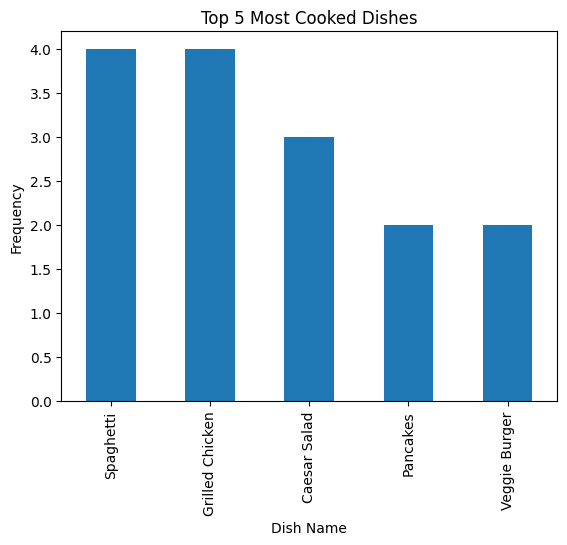

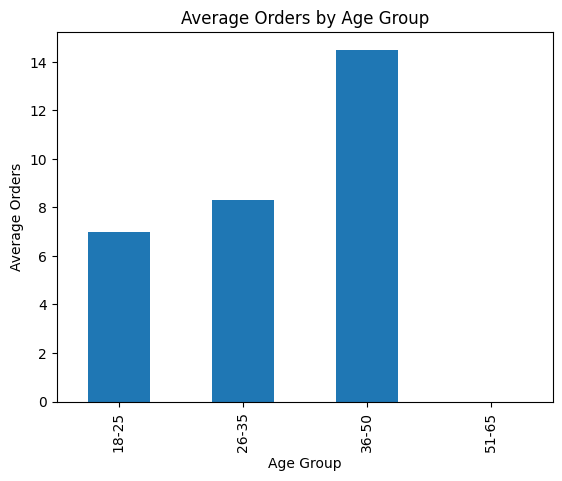

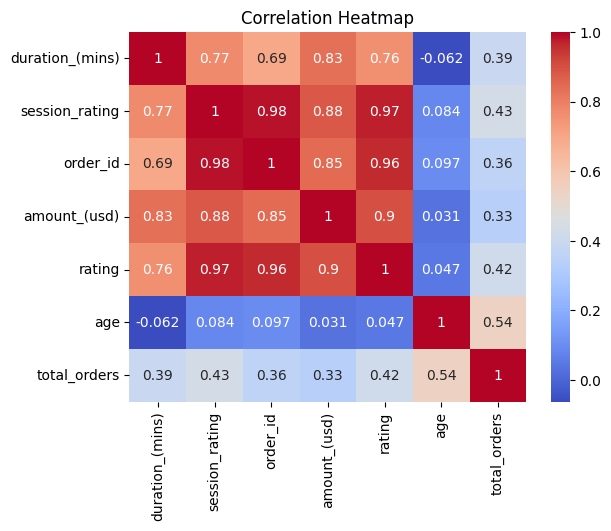

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Popular dishes
most_cooked.plot(kind='bar', title='Top 5 Most Cooked Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Frequency')
plt.show()

# Orders by Age Group
demographics.plot(kind='bar', title='Average Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Orders')
plt.show()

# Heatmap of correlations

numeric_data = final_data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
